# Gibbs Sampler

In [50]:
%matplotlib inline
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 1. Two Dimensional Gaussian Distribution

In [32]:
Mu = np.array([0,0])
Sigma = np.array([[1,0.7],[0.7,1]])
Lambda = np.linalg.inv(Sigma)

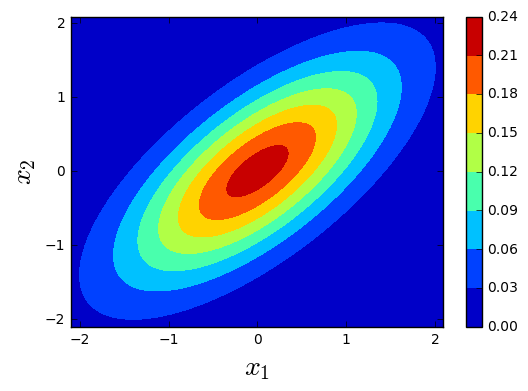

In [33]:
rho = Sigma[0,1]
lim = 3*rho
x1, x2 = np.mgrid[-lim:lim:.01, -lim:lim:.01]
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1; pos[:, :, 1] = x2
rv = multivariate_normal(Mu, Sigma)
plt.contourf(x1, x2, rv.pdf(pos))
plt.colorbar()
fontsize = 20
plt.xlabel("$x_1$", fontsize = fontsize)
plt.ylabel("$x_2$", fontsize = fontsize)

## 1. Gibbs Sampler

In [36]:
N = 40 # number of samples
x1_samples = [0]
x2_samples = [0]
x2 = 0.5
for i in range(N):
    cond_mu1 = Mu[0] - Lambda[1,0]*(x2 - Mu[1])/Lambda[0,0]
    cond_sigma1 = 1/Lambda[0,0]
    x1 = nr.normal(cond_mu1, cond_sigma1)
    x1_samples.append(x1)
    
    cond_mu2 = Mu[1] - Lambda[0,1]*(x1 - Mu[0])/Lambda[1,1]
    cond_sigma2 = 1/Lambda[1,1]
    x2 = nr.normal(cond_mu2, cond_sigma2)
    x2_samples.append(x2)

(-2.0999999999999996, 2.0999999999999996)

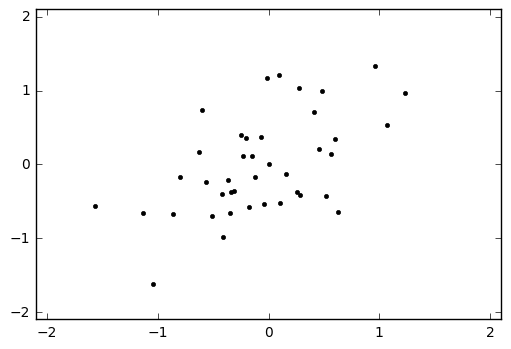

In [42]:
plt.plot(x1_samples, x2_samples, '.k')
plt.xlim((-lim,lim))
plt.ylim((-lim,lim))

## 2. Gibbs Sampler With Overrelaxation

In [35]:
N = 40 # number of samples
x0_samples_or = [0.5]
x1_samples_or = [0.5]
alpha = -0.89
x1 = 0.5
for i in range(N):  
    cond_mu0 = Mu[0] - Lambda[1,0]*(x1 - Mu[1])/Lambda[0,0]
    cond_sigma0 = 1/Lambda[0,0]
    x0 = cond_mu0 + alpha * (x0_samples_or[-1] - cond_mu0) + np.sqrt(1-alpha**2)*nr.normal(0, cond_sigma0)
    x0_samples_or.append(x0)
    
    cond_mu1 = Mu[1] - Lambda[0,1]*(x0 - Mu[0])/Lambda[1,1]
    cond_sigma1 = 1/Lambda[1,1]
    x1 = cond_mu1 + alpha * (x1_samples_or[-1] - cond_mu1) + np.sqrt(1-alpha**2)*nr.normal(0, cond_sigma1)
    x1_samples_or.append(x1)

(-0.6, 0.6)

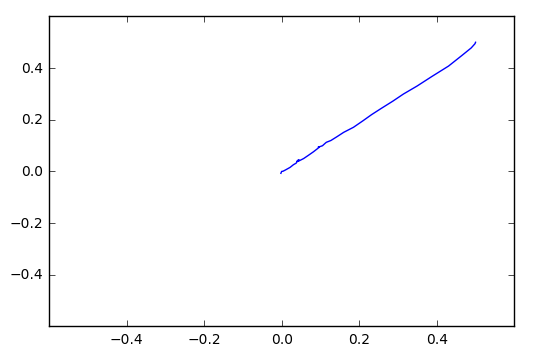

In [36]:
plt.plot(x0_samples_or, x1_samples_or)
lim = 0.6
plt.xlim((-lim,lim))
plt.ylim((-lim,lim))

## 3. Plot

(-0.6, 0.6)

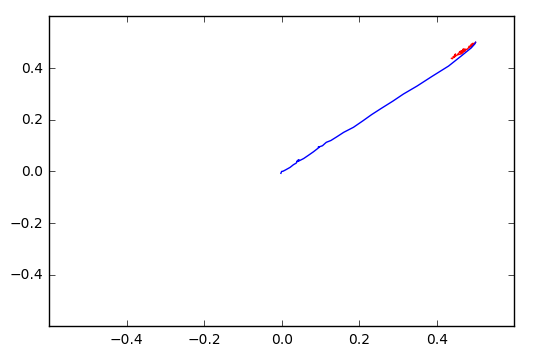

In [37]:
plt.plot(x0_samples, x1_samples,'r')
plt.plot(x0_samples_or, x1_samples_or,'b')
lim = 0.6
plt.xlim((-lim,lim))
plt.ylim((-lim,lim))